<a href="https://colab.research.google.com/github/liao771018/OpenCV/blob/main/OpenCV%E6%95%99%E5%AD%B84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 安裝文字辨識系統 tesseract(COLAB)
!apt install tesseract-ocr

In [ ]:
# 安裝 Python 文字辨識 Library
!pip install pytesseract

@iOs |

Live lext



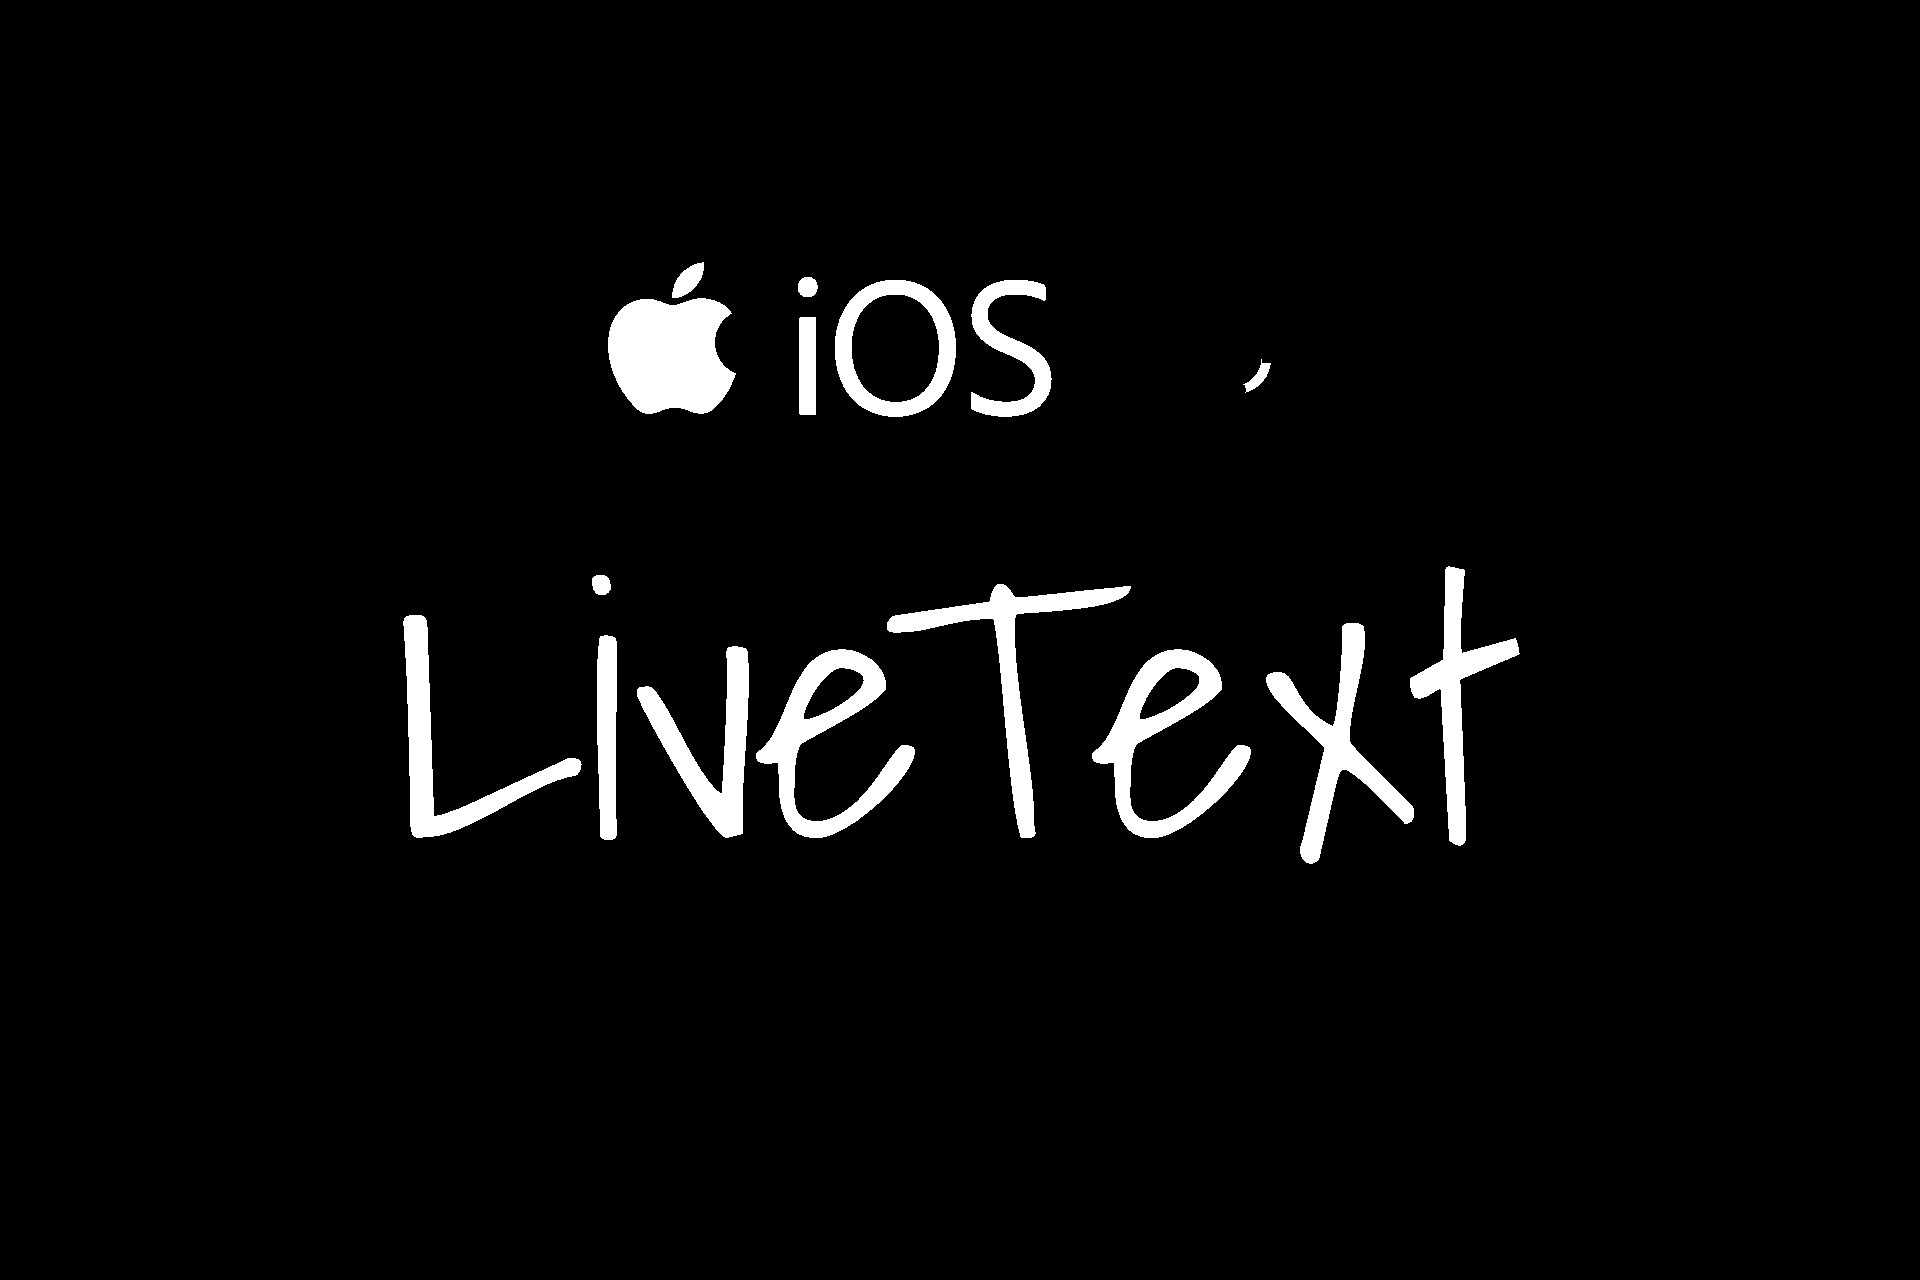

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pytesseract as pt

img = cv2.imread('2.png')

# 顏色太接近 或 圖片尺寸太小 可能會影響辨識
# 先調整圖片
img = cv2.inRange(img, (0,0,0), (100,100,100))

# 辨識結果 = pt.image_to_string(圖片變數, 語言包名稱)
text = pt.image_to_string(img, 'eng')

print(text)
cv2_imshow(img)

In [ ]:
# 偵測條碼可以使用 zbar 函式庫，該函式庫支援多種條碼的辨識，包含 QRCode 和 Code39 等 (COLAB)
!apt install libzbar-dev

In [ ]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pytesseract as pt
from pyzbar import pyzbar

# QRCode 條碼辨識
# 可以在一張圖內一次辨識多個 QRCode
qr = cv2.imread('4.jpg', 1)

# 結果變數 = pyzbar.decode(圖像變數)
# 會回傳 list 每一個索引對應一個 QRCode
qrcodes = pyzbar.decode(qr)

# 在結果函數中的內容屬性
for qrcode in qrcodes:
  print(qrcode.type) # 條碼類型
  print(qrcode.rect) # 包覆條碼的最小矩形資訊
  print(qrcode.data.decode('utf-8')) # 文字

  # 由於是日本人寫的，所以中文的話要 decode("utf-8") 後再 encode("sjis") 最後再 decode("utf-8")
  # 如果有中文的話，最好的方式是加上除錯
  try:
    print(qrcode.data.decode("utf-8").encode("sjis").decode("utf-8"))
  except:
    print(qrcode.data.decode("utf-8"))
  print('======'*15)


QRCODE
Rect(left=828, top=149, width=248, height=247)
https://www.cool3c.com/
QRCODE
Rect(left=106, top=152, width=248, height=248)
https://www.cool3c.com/
QRCODE
Rect(left=446, top=122, width=293, height=293)
https://www.cool3c.com/


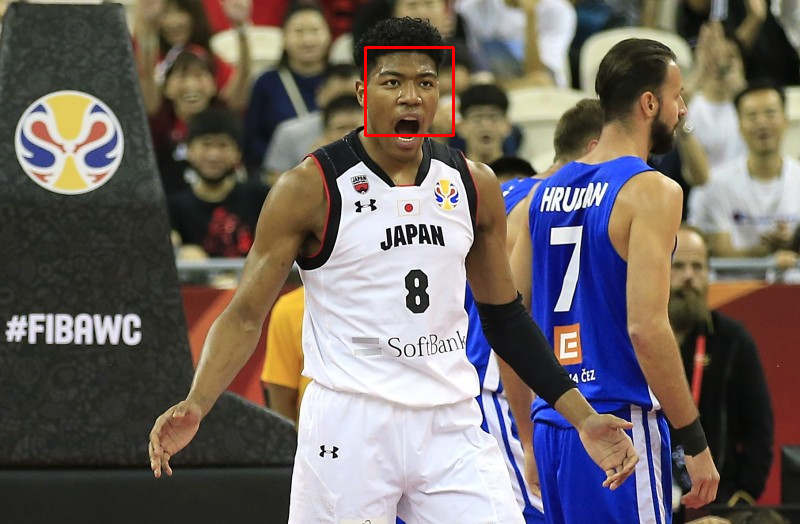

In [ ]:
# 分類器
img3 = cv2.imread('00012.png')

# 控制變數 = cv2.CascadeClassifier(分類器文件) # 分類器文件副檔名為 xml
cas = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# 結果變數 = 控制變數.detectMultiScale(圖像變數, minNeighbors=檢測門檻數 , minSize=最小尺寸)
ret = cas.detectMultiScale(img3, minNeighbors=5, minSize=(60,60))
# 會回傳二維矩陣
# 第一維是辨識到的目標
# 第二維是每一個目標的 x, y, w, h
for x,y,w,h in ret:
  cv2.rectangle(img3, (x,y), (x+w, y+h), (0,0,255), 2)

cv2_imshow(img3)